#Logistic Regression:
In this example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.

#Data
Upload the Lab 3 dataset.csv file to session storage, read and print the data set *(data is available in the workshop folder)*:




In [3]:
import pandas

df = pandas.read_csv("Lab 3 dataset.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [4]:
# What read_csv function does?
# How the data was printed?
# What is the label in the data above? What are the features? If struggling, find the answer below!

#Data preparation
All data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a map() method that takes a dictionary with information on how to convert the values.

{'UK': 0, 'USA': 1, 'N': 2}

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [6]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

# What map function does? Can you do the same to convert Go to numerical?
# Can we use label encoding instead? Try to use it for Go label and print the results?

from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers
df['Go'] = le.fit_transform(df['Go'])

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


#ML Algorithm
Import ML algorithm (the alogrithm in this example is Logistic Regression).

In [8]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#Features & Labels
X is the feature columns, y is the label column:



In [10]:
# Features list (titles should be the same as in the dataset)
features = ['Age', 'Experience', 'Rank', 'Nationality']
# Split the features from their labels
X = df[features]
y = df['Go']


In [11]:
# Check how many sample do we have? Reflect on the result.
X.shape

(13, 4)

In [12]:
# Check how many labels do we have?
y.shape

(13,)

In [13]:
# Check the statistical information?
X.describe()


,Age,Experience,Rank,Nationality
count,13.000000,13.000000,13.000000,13.000000
mean,39.615385,8.846154,6.846154,0.923077
std,13.263600,5.727800,1.908147,0.862316
min,18.000000,3.000000,4.000000,0.000000
25%,35.000000,4.000000,5.000000,0.000000
50%,42.000000,9.000000,7.000000,1.000000
75%,45.000000,13.000000,9.000000,2.000000
max,66.000000,21.000000,9.000000,2.000000


In [14]:
y.describe()

count    13.000000
mean      0.538462
std       0.518875
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Go, dtype: float64

#Model training

In [16]:
clf = LogisticRegression()
clf = clf.fit(X.values, y)


#Predict Values
We can use the Logistic Regression to predict new values.
*italicised text*
Example: Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?

In [34]:
print(clf.predict([[40, 10, 7, 1]]))

# Reflect on the result, what does it mean?
##It is a binary output for true you should go!
# Add if-else to print the result in a text-based format
if clf.predict([[40, 10, 7, 1]]) == 1:
    print("You should go")
else:
    print("Dont go")

[1]
You should go


In [30]:
#Reflect on the problem, is it a supervised or unsupervised and why? it is classification and regression. Can you check the algorthms here https://scikit-learn.org/stable/supervised_learning.html and change to another suitable algorithm?

In [32]:
print(clf.predict_proba([[40, 10, 7, 1]]))
# Reflect on the result and what do these two values represented.

[[0.41174268 0.58825732]]


Task 1: Use Decision Tree and Random Forest algorithms
Visit SKLearn website and check how to import and use these two algorithms, please do some research

[1]


[Text(0.4, 0.9, 'x[2] <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.7, 'x[3] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.5, 'x[0] <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'x[0] <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

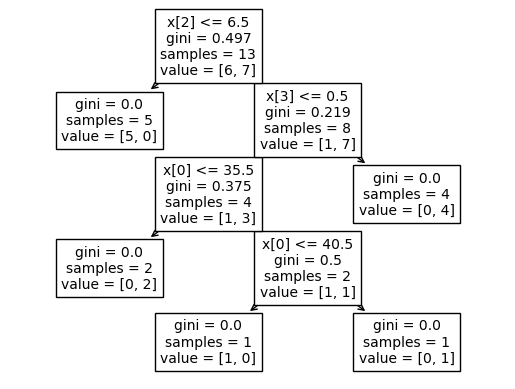

In [105]:
from sklearn import tree
import pandas
from sklearn import preprocessing

df = pandas.read_csv("Lab 3 dataset.csv")
# print(df)

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

le = preprocessing.LabelEncoder()
# Converting string labels into numbers
df['Go'] = le.fit_transform(df['Go'])

X = df[features]
Y = df['Go']

# print(X.values,Y.values)

# clf = tree.DecisionTreeRegressor()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X.values, Y.values)

print(clf.predict([[40, 10, 7, 1]]))

tree.plot_tree(clf)